In [1]:
import torch
import pandas as pd

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


In [2]:
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = train.drop('label', axis = 1)
y_train = train['label']

print(f'Test Data Shape: {test.shape}')
print(f'Train Data Shape: {train.shape}')

Test Data Shape: (28000, 784)
Train Data Shape: (42000, 785)


In [4]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 查看标签的类别
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [6]:
# reshape数据，适合用于CNN

X_train = x_train.values.reshape(x_train.shape[0],28, 28, 1)
X_test = test.values.reshape(test.shape[0],28, 28, 1)

print(X_train[0].shape)
print(X_test[0].shape)

(28, 28, 1)
(28, 28, 1)


In [7]:
from tensorflow.keras.utils import to_categorical

# 标签One-hot编码
y_train = to_categorical(y_train, num_classes = 10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
# 数据归一化
X_train = X_train / 255.0
X_test = X_test / 255.0

Text(0.5, 1.0, '1')

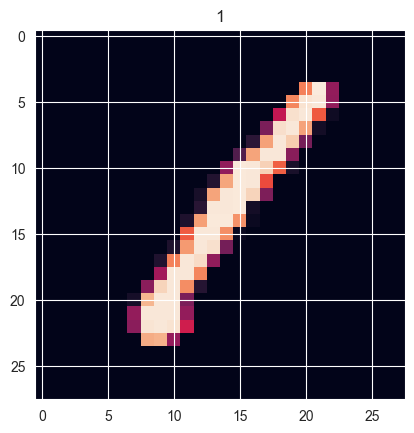

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.title(train['label'][0])

In [10]:
from sklearn.model_selection import train_test_split

# 分割训练数据
random_state = 23
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=random_state)


In [11]:
print(f'X_train Shape: {x_train.shape}')
print(f'X_val Data Shape: {y_train.shape}')

X_train Shape: (42000, 784)
X_val Data Shape: (33600, 10)


In [12]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 887,530 (3.39 MB)

 Trainable params: 887,530 (3.39 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(0.001, rho=0.9, epsilon=1e-08)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )


In [22]:
epoch_history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs= 12)

Epoch 1/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8458 - loss: 0.4653 - val_accuracy: 0.9767 - val_loss: 0.0763
Epoch 2/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9768 - loss: 0.0824 - val_accuracy: 0.9861 - val_loss: 0.0428
Epoch 3/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9823 - loss: 0.0575 - val_accuracy: 0.9902 - val_loss: 0.0362
Epoch 4/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9853 - loss: 0.0495 - val_accuracy: 0.9893 - val_loss: 0.0337
Epoch 5/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9870 - loss: 0.0454 - val_accuracy: 0.9904 - val_loss: 0.0403
Epoch 6/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9878 - loss: 0.0426 - val_accuracy: 0.9911 - val_loss: 0.0352
Epoch 7/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9892 - loss: 0.0404 - val_accuracy: 0.9883 - val_loss: 0.0616
Epoch 8/12
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9900 - loss: 0.0382 - 

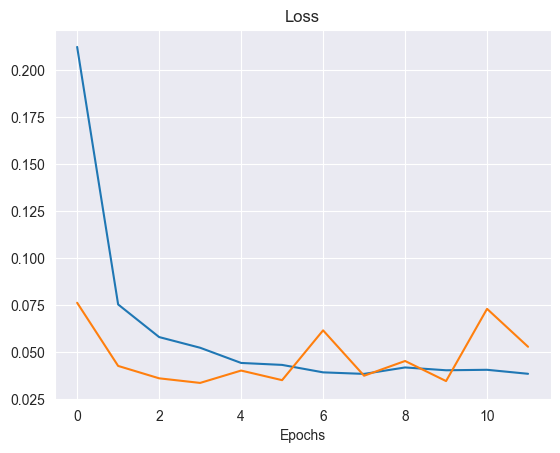

In [23]:
import seaborn as sns

sns.lineplot(epoch_history.history['loss'])
sns.lineplot(epoch_history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

In [24]:
import numpy as np

X_test = test.values.reshape(test.shape[0], 28, 28, 1)
X_test = X_test / 255.0
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
submission = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission.to_csv('Mnist_digit_submission.csv', index=False)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
